<a href="https://colab.research.google.com/github/atrirahma/biomedic-iot/blob/main/Heart%20Disease_SBC_HistogramPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Hapus kolom 'ca' dan 'thal'
X = X.drop(columns=['ca', 'thal'])

# Pastikan dataset sekarang tanpa kolom tersebut
print("Kolom setelah penghapusan:")
print(X.columns)

# Standarisasi dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Ambil nama fitur yang baru
feature_names = X.columns
n_features = X.shape[1]


Kolom setelah penghapusan:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope'],
      dtype='object')


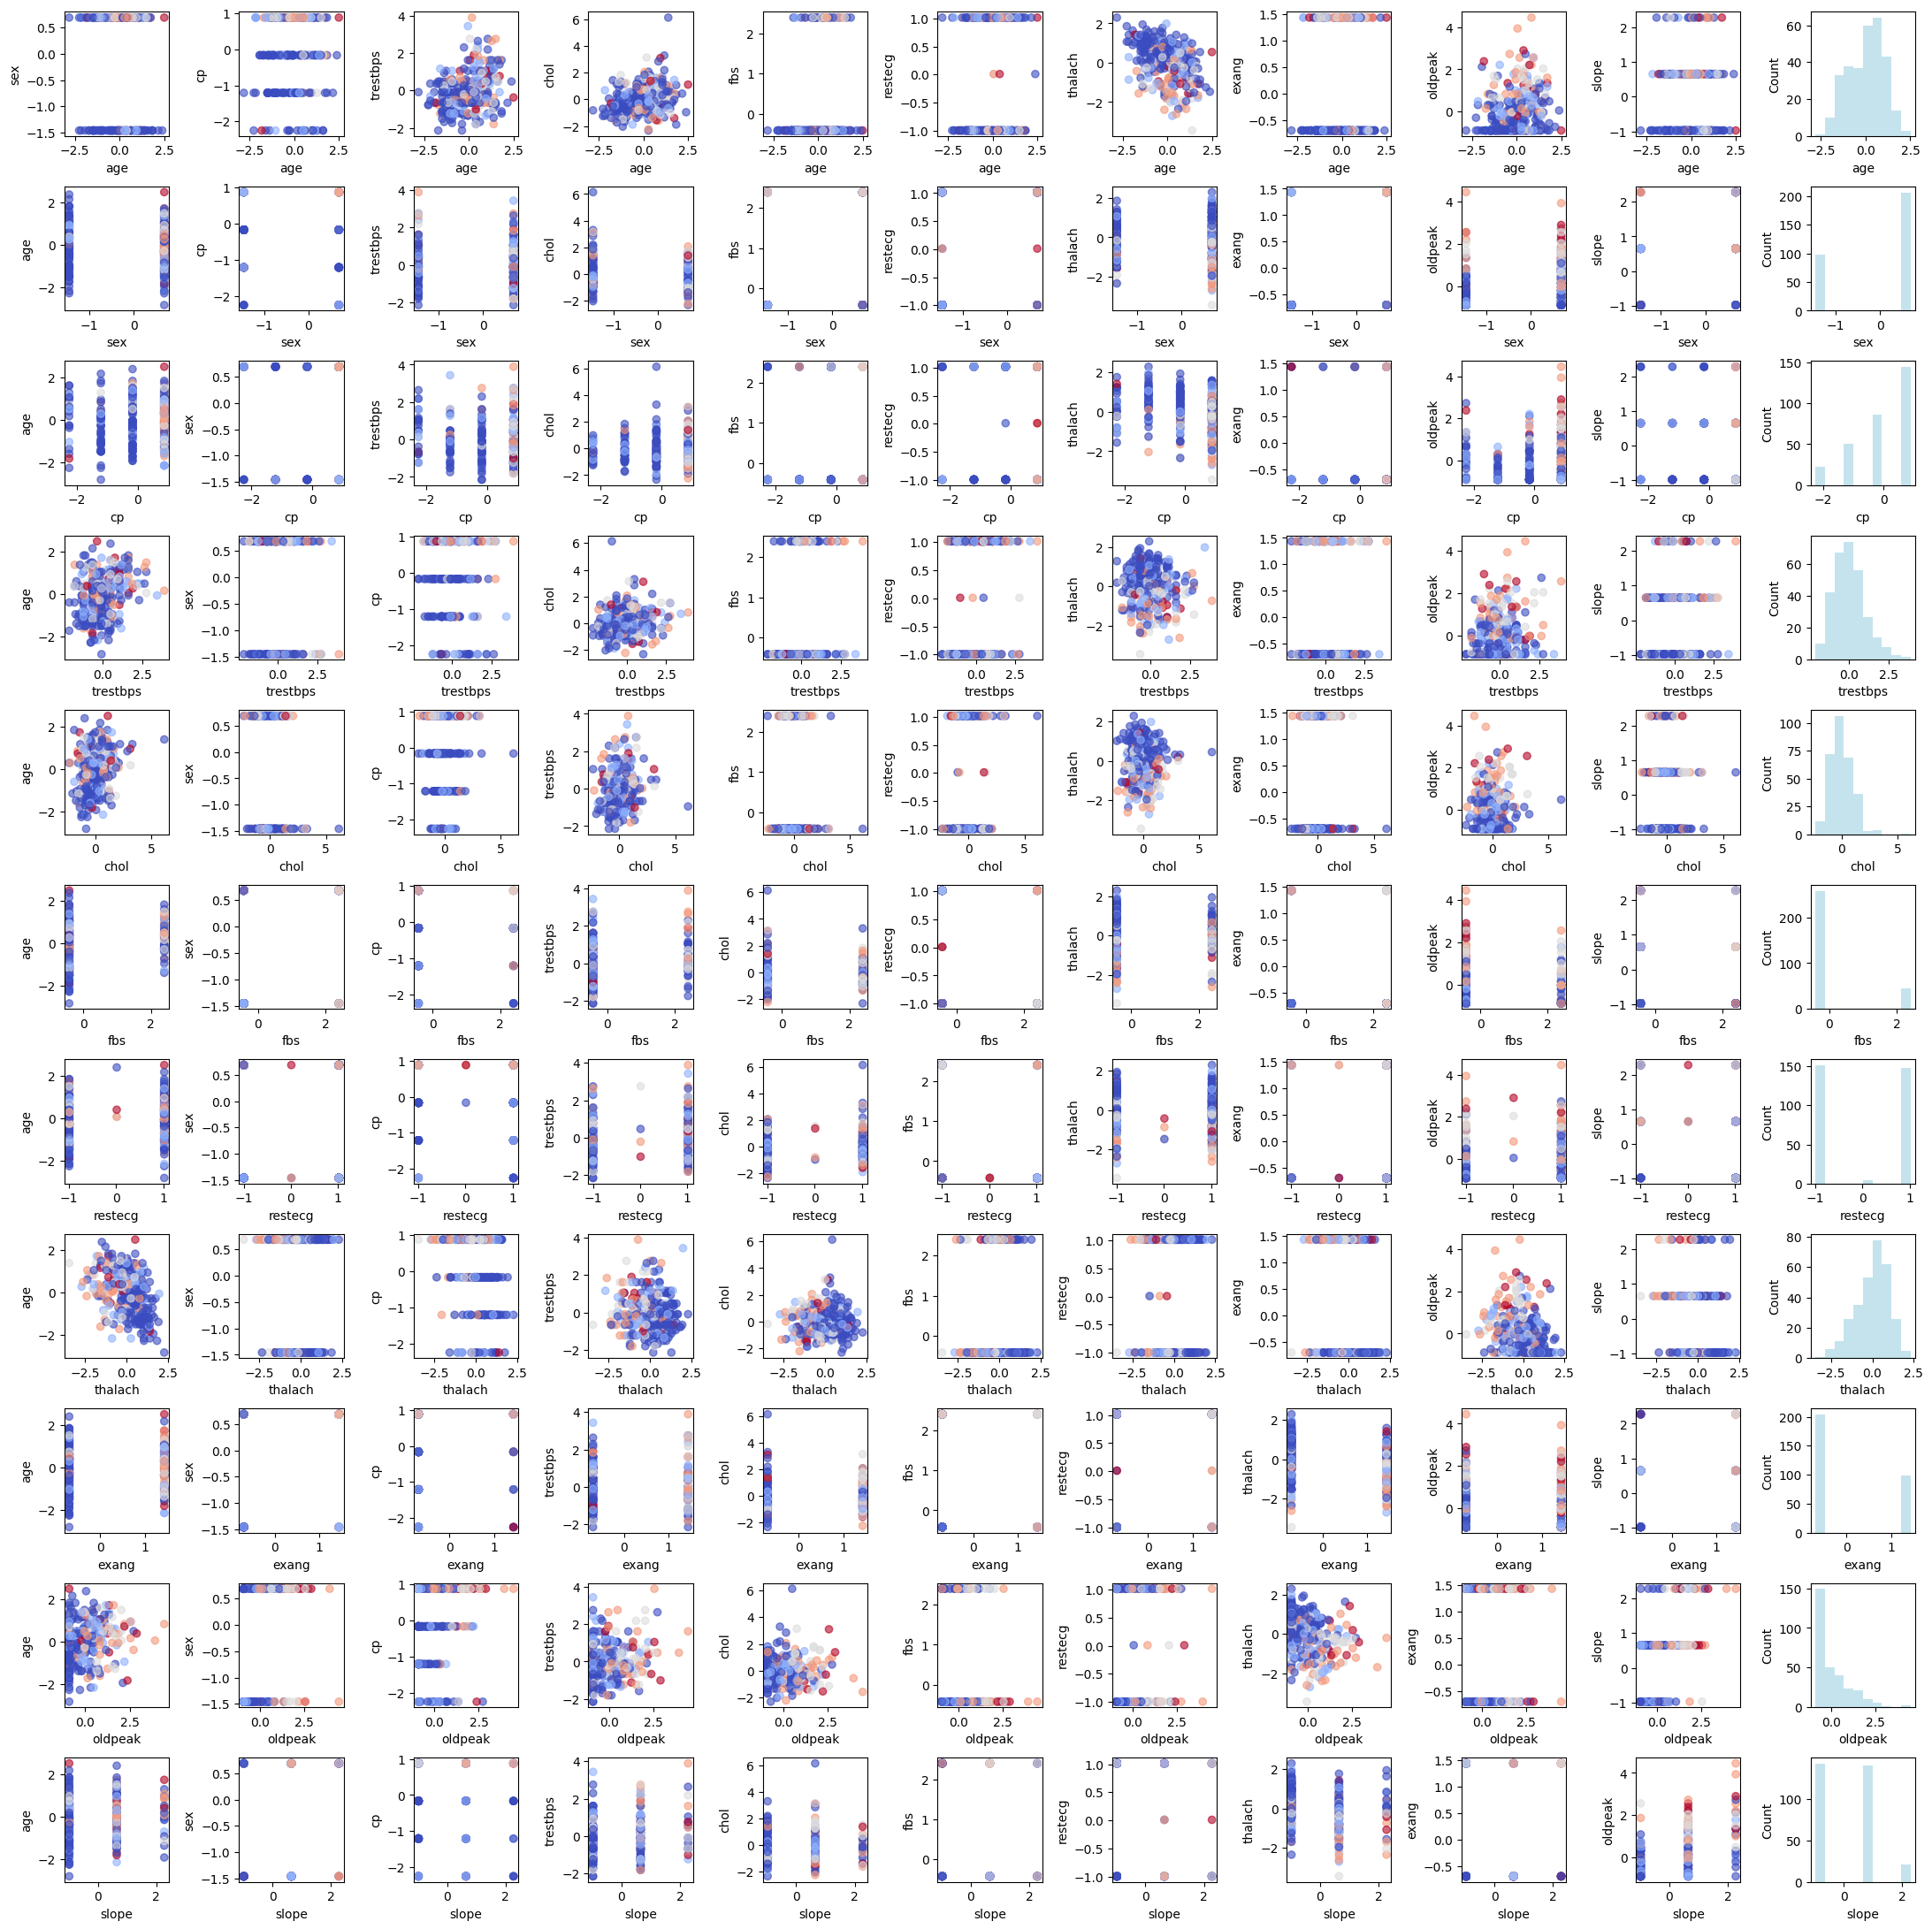

In [69]:
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(n_features*2, n_features*2))
fig.tight_layout(pad=2.0)

for i in range(n_features):
    J = np.arange(n_features)
    J = np.delete(J, i)
    for k, j in enumerate(J):
        # Change here: Access the numerical values of the target variable using .values
        ax[i, k].scatter(X_std[:, i], X_std[:, j], c=y.values.ravel(), cmap="coolwarm", alpha=0.6)
        ax[i, k].set_xlabel(feature_names[i])
        ax[i, k].set_ylabel(feature_names[j])

# Histogram di kolom terakhir
for i in range(n_features):
    ax[i, -1].hist(X_std[:, i], color='lightblue', alpha=0.7)
    ax[i, -1].set_ylabel('Count')
    ax[i, -1].set_xlabel(feature_names[i])

plt.show()

In [70]:
# Matriks kovarians
cov_mat = np.cov(X_std.T)

# Check for NaN or infinite values in cov_mat
if np.isnan(cov_mat).any() or np.isinf(cov_mat).any():
    # Handle NaN/inf values (e.g., imputation or removal)
    cov_mat = np.nan_to_num(cov_mat)  # Replace NaN/inf with 0

# Singular Value Decomposition (SVD)
U, S, V = np.linalg.svd(cov_mat)
eig_vals = S
eig_vecs = U

# Koreksi tanda eigenvector untuk konsistensi
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs_ = eig_vecs * signs[np.newaxis, :]

print("Eigenvalues:", eig_vals)
print("Eigenvectors (dikoreksi):", eig_vecs_)


Eigenvalues: [2.60389636 1.51354358 1.19840476 1.01719083 0.96091023 0.82888125
 0.78749901 0.72549789 0.58462035 0.43666209 0.37931749]
Eigenvectors (dikoreksi): [[-0.31971029  0.3855314  -0.05087223 -0.0604347  -0.3609921   0.52809143
   0.00828774  0.155691   -0.09742143  0.45824483  0.2998784 ]
 [-0.0511216  -0.39183605  0.44863465  0.40289883  0.15145913  0.33634493
   0.34281783  0.39033583 -0.21872016 -0.12488349  0.10422228]
 [-0.30745046 -0.22734466 -0.42485319  0.32282035 -0.13483009 -0.18655407
  -0.01517234 -0.29324957 -0.64193092 -0.03907723  0.12753815]
 [-0.19354399  0.45514214  0.30292734 -0.02385627 -0.06111182 -0.10002172
   0.61270444 -0.43378002 -0.03830452 -0.29028557 -0.00291163]
 [-0.1127361   0.4527083  -0.40532556  0.15443417  0.25022486 -0.23702148
   0.16173291  0.63180463 -0.02828146 -0.22046397 -0.0260106 ]
 [-0.07335028  0.24472643  0.48691539  0.40425829 -0.39532056 -0.39985399
  -0.43008923  0.1412977  -0.04713745  0.01683283 -0.1029986 ]
 [-0.18671537  

<ipython-input-71-0042692bb878>:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


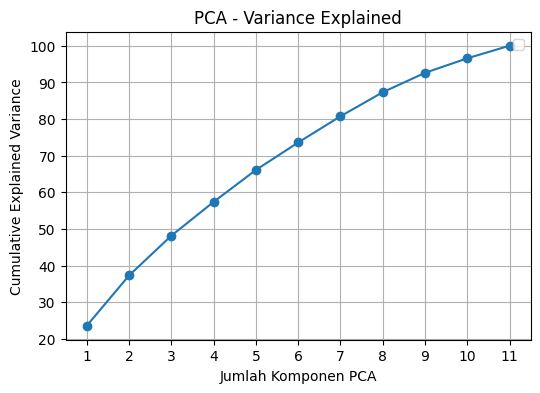

Optimal jumlah komponen utama (k): 10


In [71]:
# Hitung explained variance
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total) * 100 for i in eig_vals]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

# Visualisasi cumulative explained variance
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(1, n_features + 1), cum_explained_variance, '-o')
ax.set_xticks(np.arange(1, n_features + 1))
ax.set_xlabel('Jumlah Komponen PCA')
ax.set_ylabel('Cumulative Explained Variance')

ax.legend()
plt.title("PCA - Variance Explained")
plt.grid()
plt.show()

# Pilih jumlah komponen yang mempertahankan ≥95% informasi
k = np.argmax(cum_explained_variance >= 95) + 1
print(f"Optimal jumlah komponen utama (k): {k}")


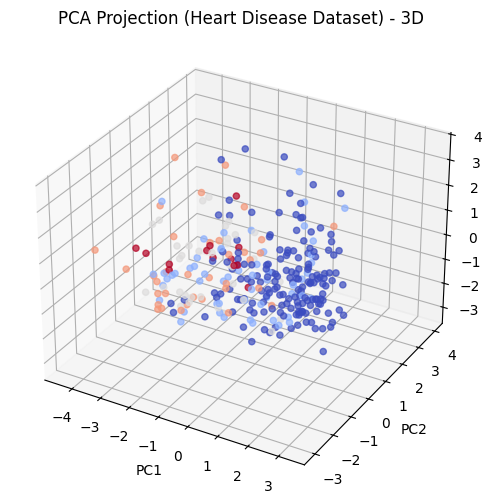

In [72]:
# Pilih top k eigenvectors untuk reduksi dimensi
k = 3
W = eig_vecs_[:, :k]  # Projection matrix

# Proyeksikan dataset ke PCA
X_proj = X_std @ W

# Visualisasi 3D Scatter Plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

# Scatter plot dengan warna berdasarkan target (mirip Iris)
ax.scatter(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], c=y, cmap="coolwarm", alpha=0.7)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA Projection (Heart Disease Dataset) - 3D")

plt.show()
